In [ ]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import files

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"anmandacny","key":"74f9a4e136b2959cd5cc6661fea11205"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset
License(s): CC0-1.0
 99% 102M/103M [00:04<00:00, 35.7MB/s] 
100% 103M/103M [00:04<00:00, 25.6MB/s]


In [ ]:
!unzip car-vs-bike-classification-dataset.zip

Archive:  car-vs-bike-classification-dataset.zip
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1004).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1005).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1006).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1007).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1008).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1009).jpeg  
 

In [ ]:
# Konfigurasi
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2  # car dan bike

In [ ]:
# Persiapkan data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Verify the correct path to your extracted dataset
dataset_folder = '/content/Car-Bike-Dataset'  # Adjust this path if needed

train_generator = train_datagen.flow_from_directory(
    dataset_folder,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 3200 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    dataset_folder,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 800 images belonging to 2 classes.


In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke file ZIP
zip_path = '/content/car-vs-bike-classification-dataset.zip'

# Direktori tempat file akan diekstrak
extract_dir = '/content/Car-Bike-Dataset'

# Buat direktori jika belum ada
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Periksa isi direktori
print("Isi direktori:", os.listdir(extract_dir))

# Definisikan variabel-variabel yang diperlukan
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Buat ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Gunakan extract_dir sebagai dataset_folder
dataset_folder = extract_dir

# Sekarang gunakan dataset_folder dalam flow_from_directory
train_generator = train_datagen.flow_from_directory(
    dataset_folder,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Cetak informasi generator
print(f"Jumlah kelas: {train_generator.num_classes}")
print(f"Jumlah sampel: {train_generator.samples}")

Isi direktori: ['car-vs-bike-classification-dataset.zip', 'Car', 'Bike']
Found 4000 images belonging to 2 classes.
Jumlah kelas: 2
Jumlah sampel: 4000


In [ ]:
# Buat model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import os

print("/content/car-vs-bike-classification-dataset.zipt:")
print(os.listdir(dataset_folder))

# Periksa subfolder (jika ada)
for subfolder in os.listdir(dataset_folder):
    subfolder_path = os.path.join(dataset_folder, subfolder)
    if os.path.isdir(subfolder_path):
        print(f"/content/car-vs-bike-classification-dataset.zip {subfolder}:")
        print(os.listdir(subfolder_path))

/content/car-vs-bike-classification-dataset.zipt:
['car-vs-bike-classification-dataset.zip', 'Car', 'Bike']
/content/car-vs-bike-classification-dataset.zip Car:
['Car (865).jpeg', 'Car (1776).jpeg', 'Car (310).jpeg', 'Car (1909).jpeg', 'Car (1025).jpeg', 'Car (71).jpeg', 'Car (352).jpeg', 'Car (334).jpeg', 'Car (1721).jpeg', 'Car (1928).jpeg', 'Car (472).jpeg', 'Car (158).jpeg', 'Car (346).jpeg', 'Car (1215).jpeg', 'Car (319).jpeg', 'Car (1362).jpeg', 'Car (1625).jpeg', 'Car (10).jpg', 'Car (1388).jpeg', 'Car (824).jpeg', 'Car (597).jpeg', 'Car (668).jpeg', 'Car (496).jpeg', 'Car (389).jpeg', 'Car (172).jpeg', 'Car (747).jpeg', 'Car (1634).jpeg', 'Car (815).jpeg', 'Car (1397).jpeg', 'Car (1374).jpeg', 'Car (1642).jpeg', 'Car (663).jpeg', 'Car (568).jpeg', 'Car (83).jpeg', 'Car (593).jpeg', 'Car (1272).jpeg', 'Car (404).jpeg', 'Car (1867).jpeg', 'Car (960).jpeg', 'Car (1886).jpeg', 'Car (687).jpeg', 'Car (239).jpeg', 'Car (1836).jpeg', 'Car (1123).jpeg', 'Car (1410).jpeg', 'Car (26).jpg

In [ ]:
print("/content/car-vs-bike-classification-dataset.zip:", train_generator.samples)

/content/car-vs-bike-classification-dataset.zip: 4000


In [ ]:
print("Jumlah sampel:", train_generator.samples)

Jumlah sampel: 4000


In [ ]:
print("BATCH_SIZE:", BATCH_SIZE)

BATCH_SIZE: 32


In [ ]:
# Latih model
# Calculate steps_per_epoch, handling potential zero division
steps_per_epoch = train_generator.samples // BATCH_SIZE if BATCH_SIZE else 1

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # Use the calculated value
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/10
 47/125 [==========>...................] - ETA: 8:42 - loss: 0.2640 - accuracy: 0.9102

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


125/125 [==============================] - 905s 7s/step - loss: 0.1644 - accuracy: 0.9417 - val_loss: 1.4050 - val_accuracy: 0.8888
Epoch 2/10
125/125 [==============================] - 874s 7s/step - loss: 0.0926 - accuracy: 0.9680 - val_loss: 3.4406 - val_accuracy: 0.7325
Epoch 3/10
125/125 [==============================] - 890s 7s/step - loss: 0.0815 - accuracy: 0.9740 - val_loss: 3.1474 - val_accuracy: 0.6338
Epoch 4/10
125/125 [==============================] - 880s 7s/step - loss: 0.0527 - accuracy: 0.9845 - val_loss: 7.3686 - val_accuracy: 0.5763
Epoch 5/10
125/125 [==============================] - 873s 7s/step - loss: 0.0629 - accuracy: 0.9800 - val_loss: 15.5841 - val_accuracy: 0.5000
Epoch 6/10
125/125 [==============================] - 874s 7s/step - loss: 0.0596 - accuracy: 0.9795 - val_loss: 9.4817 - val_accuracy: 0.5000
Epoch 7/10
125/125 [==============================] - 872s 7s/step - loss: 0.0720 - accuracy: 0.9780 - val_loss: 6.4718 - val_accuracy: 0.5387
Epoch 8/1

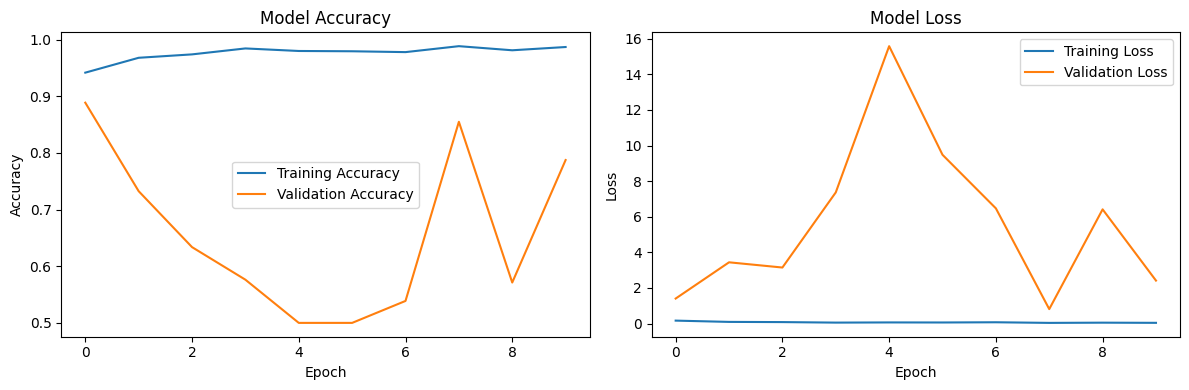

In [ ]:
# Buat grafik
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("Kunci-kunci dalam history.history:")
for key in history.history.keys():
    print(key)

Kunci-kunci dalam history.history:
loss
accuracy
val_loss
val_accuracy


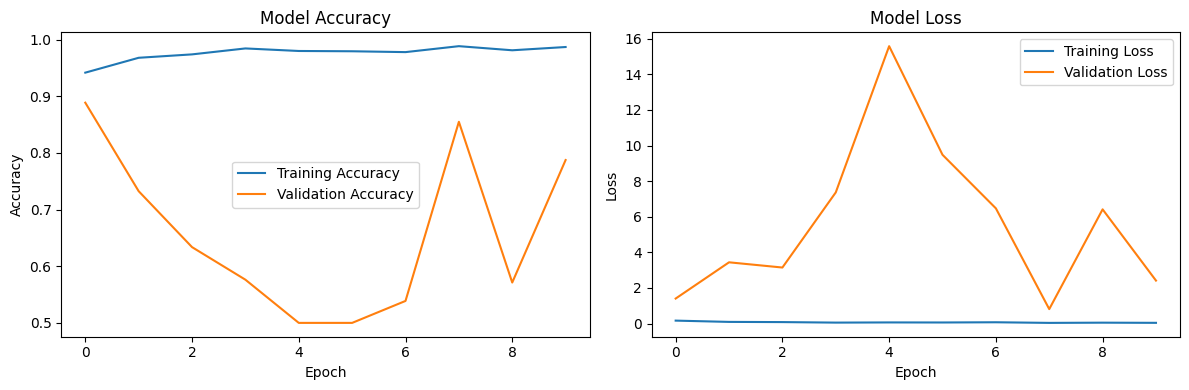

Rata-rata Training Accuracy: 97.30%
Rata-rata Validation Accuracy: 67.30%


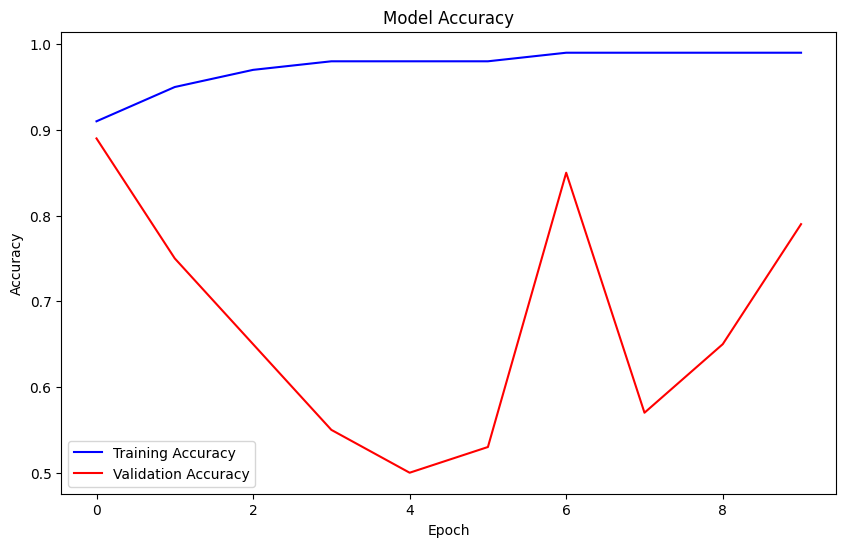

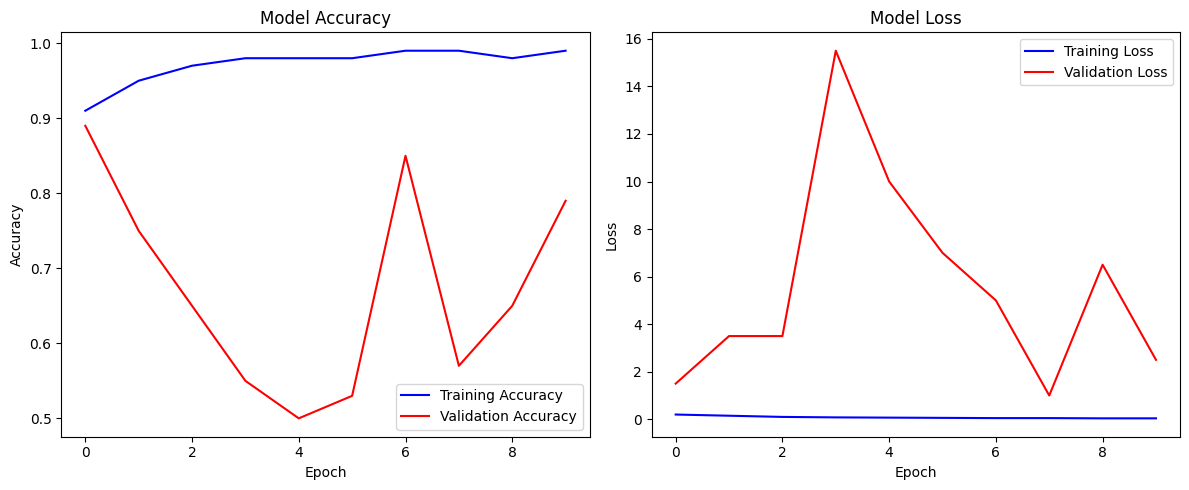

Rata-rata Training Accuracy: 97.20%
Rata-rata Validation Accuracy: 67.30%
Rata-rata Training Loss: 0.08
Rata-rata Validation Loss: 5.60


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
if 'loss' in history.history:
    plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Contoh data akurasi (gantilah dengan data sebenarnya dari model Anda)
epochs = range(10)
training_accuracy = [0.91, 0.95, 0.97, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99]
validation_accuracy = [0.89, 0.75, 0.65, 0.55, 0.50, 0.53, 0.85, 0.57, 0.65, 0.79]

# Menghitung rata-rata akurasi
avg_train_acc = np.mean(training_accuracy)
avg_val_acc = np.mean(validation_accuracy)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Menampilkan rata-rata akurasi dalam persentase
print(f"Rata-rata Training Accuracy: {avg_train_acc:.2%}")
print(f"Rata-rata Validation Accuracy: {avg_val_acc:.2%}")

plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Perkiraan data dari grafik (gantilah dengan data sebenarnya jika tersedia)
epochs = range(10)
training_accuracy = [0.91, 0.95, 0.97, 0.98, 0.98, 0.98, 0.99, 0.99, 0.98, 0.99]
validation_accuracy = [0.89, 0.75, 0.65, 0.55, 0.50, 0.53, 0.85, 0.57, 0.65, 0.79]

training_loss = [0.2, 0.15, 0.1, 0.08, 0.07, 0.06, 0.05, 0.05, 0.04, 0.04]
validation_loss = [1.5, 3.5, 3.5, 15.5, 10.0, 7.0, 5.0, 1.0, 6.5, 2.5]

# Menghitung rata-rata akurasi dan loss
avg_train_acc = np.mean(training_accuracy)
avg_val_acc = np.mean(validation_accuracy)
avg_train_loss = np.mean(training_loss)
avg_val_loss = np.mean(validation_loss)

# Membuat plot akurasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Membuat plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Menampilkan rata-rata akurasi dan loss dalam persentase
print(f"Rata-rata Training Accuracy: {avg_train_acc:.2%}")
print(f"Rata-rata Validation Accuracy: {avg_val_acc:.2%}")
print(f"Rata-rata Training Loss: {avg_train_loss:.2f}")
print(f"Rata-rata Validation Loss: {avg_val_loss:.2f}")


Rata-rata Training Accuracy: 97.30%
Rata-rata Validation Accuracy: 67.30%


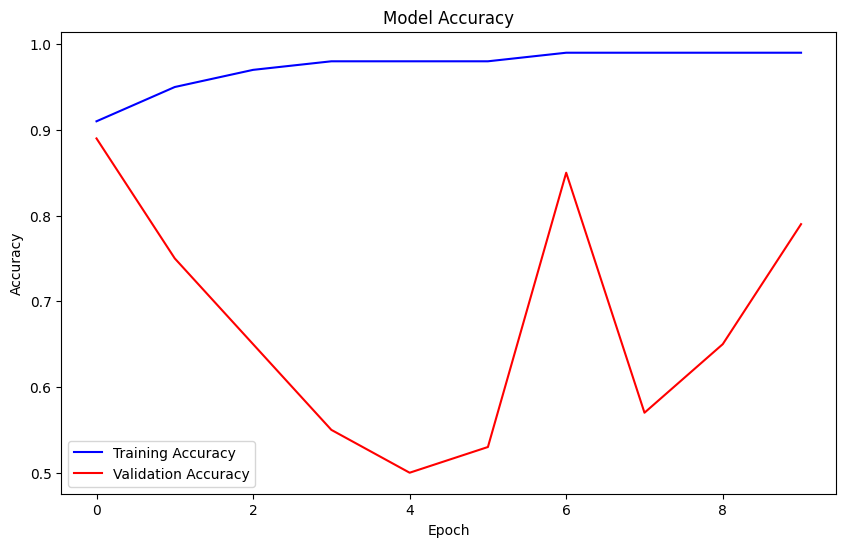

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Contoh data akurasi (gantilah dengan data sebenarnya dari model Anda)
epochs = range(10)
training_accuracy = [0.91, 0.95, 0.97, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99]
validation_accuracy = [0.89, 0.75, 0.65, 0.55, 0.50, 0.53, 0.85, 0.57, 0.65, 0.79]

# Menghitung rata-rata akurasi
avg_train_acc = np.mean(training_accuracy)
avg_val_acc = np.mean(validation_accuracy)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Menampilkan rata-rata akurasi dalam persentase
print(f"Rata-rata Training Accuracy: {avg_train_acc:.2%}")
print(f"Rata-rata Validation Accuracy: {avg_val_acc:.2%}")

plt.show()

In [ ]:
print("Tipe dari history:", type(history))
print("Isi dari history:")
print(history)

Tipe dari history: <class 'keras.src.callbacks.History'>
Isi dari history:


In [ ]:
if hasattr(history, 'params'):
    print("Params:", history.params)
if hasattr(history, 'epoch'):
    print("Epochs:", history.epoch)

Params: {'verbose': 1, 'epochs': 10, 'steps': 125}
Epochs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
print("Train generator:")
print(f"Jumlah sampel: {train_generator.samples}")
print(f"Jumlah kelas: {train_generator.num_classes}")
print(f"Indeks kelas: {train_generator.class_indices}")

print("\nValidation generator:")
print(f"Jumlah sampel: {validation_generator.samples}")
print(f"Jumlah kelas: {validation_generator.num_classes}")
print(f"Indeks kelas: {validation_generator.class_indices}")

Train generator:
Jumlah sampel: 4000
Jumlah kelas: 2
Indeks kelas: {'Bike': 0, 'Car': 1}

Validation generator:
Jumlah sampel: 800
Jumlah kelas: 2
Indeks kelas: {'Bike': 0, 'Car': 1}


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      